## Imports 

In [103]:
import os
import re
import config
import pandas as pd 
from sqlalchemy import create_engine
from dotenv import load_dotenv
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Data Import

## DB connection

In [6]:
def get_db_credentials():
    load_dotenv()
    db_username = os.environ.get('DB_USERNAME')
    db_host = os.environ.get('DB_HOST')
    db_port = os.environ.get('DB_PORT')
    db_name = os.environ.get('DB_NAME')
    db_password = os.environ.get('DB_PASSWORD')
    return db_username, db_host, db_port, db_name, db_password

def create_DB_engine(db_username:str, db_host:str, db_port:str, db_name:str, db_password:str):
    engine = create_engine(
        f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}'
        )
    return engine

In [8]:
credentials = get_db_credentials()
engine = create_DB_engine(*credentials)

## SQL - Queries

In [114]:
def str_to_list(text, delimiter=','):
    return text.split(delimiter)

def remove_curly_braces(text):
    return re.sub('[{}]', '',text)

def get_placement(song_id):
    if song_id in song_id_to_pos.keys():
        return song_id_to_pos[song_id]
    else:
        return None
    

TOP 100:


In [34]:
top100_query = 'SELECT * FROM "Top100" ORDER BY "date" DESC LIMIT 1;'

In [39]:
top100_df = pd.read_sql(top100_query, engine)
top100_df['song_ids'] = remove_curly_braces(
    top100_df['song_ids'][0])


In [118]:
song_id_to_pos = {int(id): pos for pos, id in enumerate(str_to_list(top100_df['song_ids'][0]), start=1)}
genre_name = top100_df['genre_name'][0]

SONG INFO:

In [64]:
song_query = 'SELECT * FROM "Song" WHERE "date" = \'2023-11-13\';'

In [75]:
#song_df = pd.read_sql(song_query, engine) # messed up with type in SQL table, import from pkl-files temporarly
song_df = pd.read_pickle(config.PROCESSED_DFS_LOCATION + '5_SONG_INFO_df.pkl')

Merge top 100 placement with song info

In [119]:
song_df['place'] = song_df['song_id'] \
    .apply(get_placement)

In [189]:
song_df.head()

,song_id,song_name,mix_name,artist_id,remixers_id,album_id,genre_id,sub_genre_id,key,bpm,length,wave_form_picture,published,price,curency,date,place
0,18030245,Jealous,Extended Mix,[660408],[None],4229356,5,None,E Minor,128,5:45,https://geo-media.beatport.com/image_size/1500...,2023-08-25,1.39,EUR,2023-11-16,1
1,18141988,LOVE DESIRE,Extended Mix,[322845],[None],4267668,5,None,F Major,126,5:47,https://geo-media.beatport.com/image_size/1500...,2023-10-13,2.39,EUR,2023-11-16,2
2,17716164,Take It Off,Extended Mix,"[628537, 1085148]",[None],4125553,5,None,Eb Minor,127,5:26,https://geo-media.beatport.com/image_size/1500...,2023-06-09,2.39,EUR,2023-11-16,3
3,17839150,(It Goes Like) Nanana,Original Mix,[528008],[None],4165364,5,None,C Minor,130,6:07,https://geo-media.beatport.com/image_size/1500...,2023-06-15,1.39,EUR,2023-11-16,4
4,18166513,The Greatest Thing Alive,Extended Mix,"[1938, 7043, 151058]",[None],4275738,5,None,A Minor,122,6:04,https://geo-media.beatport.com/image_size/1500...,2023-10-13,2.39,EUR,2023-11-16,5


# Analysis

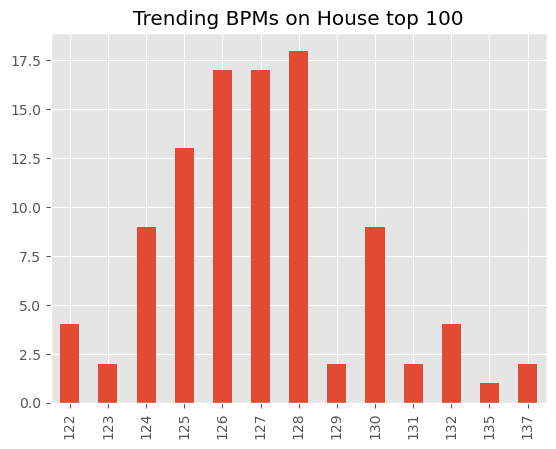

In [107]:
ax = song_df['bpm'].value_counts() \
    .sort_index() \
    .plot(kind='bar', title=f'Trending BPMs on {genre_name} top 100')
plt.show()

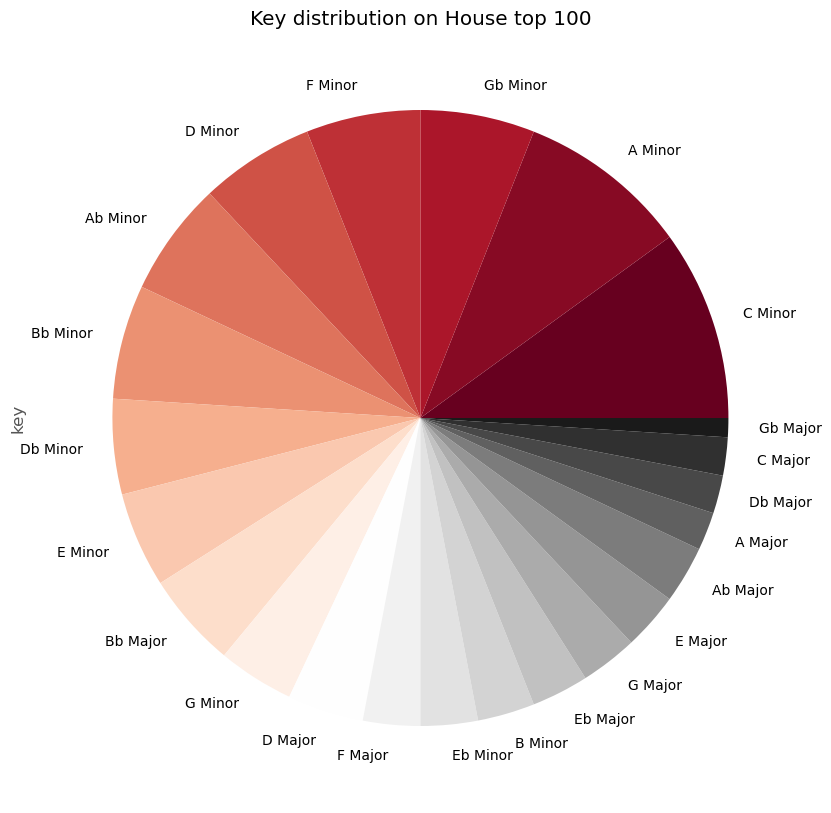

In [188]:
ax = song_df['key'] \
    .value_counts() \
    .plot.pie(
        title=f'Key distribution on {genre_name} top 100',
        colormap='RdGy',
        figsize=(10, 10)
    )
plt.show()